# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [34]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')



# -> Let's begin with getting familiar with the data

In [35]:
# Reading the data

df = pd.read_csv("Leads.csv")

# Let's checlout the few rows of the dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [36]:
# This will get us a thorugh idea on what the dataset actually holds

df.info()
df.describe()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

(9240, 37)

In [37]:
# Let's also take a look if there's any duplicates.

df.duplicated().sum()

0

In [38]:
# Let's take a look at all the null values per column.

def null_summary(df):
    # Count the number of null values in each column
    null_count = df.isnull().sum()
    
    # Calculate the percentage of null values in each column
    total_values = len(df)
    null_percentage = (null_count / total_values) * 100
    
    # Sum of null values in the DataFrame
    total_null = null_count.sum()
    
    return null_count, null_percentage, total_null

# Example usage:
# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name
null_count, null_percentage, total_null = null_summary(df)

print("Null count per column:")
print(null_count)


Null count per column:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newsp

In [39]:
# Percentage of null values per column

print("\nPercentage of null values per column:")
print(null_percentage)



Percentage of null values per column:
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search           

In [40]:
# Total number ofnull values in the dataframe

print("\nTotal number of null values in the DataFrame:", total_null)


Total number of null values in the DataFrame: 41039


**Observations**
* A large number of columns have null values. Those columns should ideally be dropped


* `Prospect ID` and `Lead Number` both serve the same purpose. They are both unique identifiers. We will drop `Prospect ID`


* Column names are just too long. We will modify the column names


* Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when someone does not select anything from the dropdown

# -> Data cleaning 

In [41]:
# Converting to snakecase

df.columns = df.columns.str.replace(' ', '_').str.lower()

df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [42]:
# Reducing the length of column names

df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [43]:
# Converting all the values to lower case

df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [44]:
# Replacing 'Select' with NaN because it means no option is been selected

df = df.replace('select',np.nan)

In [45]:
# Checking if there are any columns with one unique value because it won't affect our analysis even if we drop them

df.nunique() == 1

prospect_id                     False
lead_number                     False
lead_origin                     False
lead_source                     False
do_not_email                    False
do_not_call                     False
converted                       False
total_visits                    False
time_on_website                 False
page_views_per_visit            False
last_activity                   False
country                         False
specialization                  False
source                          False
occupation                      False
course_selection_reason         False
search                          False
magazine                         True
newspaper_article               False
x_education_forums              False
newspaper                       False
digital_advertisement           False
through_recommendations         False
courses_updates                  True
tags                            False
lead_quality                    False
supply_chain

In [46]:
# Dropping unique valued columns

df1= df.drop(['magazine','courses_updates','cheque_payment','dm_content_updates','supply_chain_content_updates'],axis=1)

In [47]:
# Checking the percentage of missing values once again so we can treate them this time

round(null_percentage,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [48]:
# Removing all the columns that have 35% null values

df2 = df1.drop(['source', 'city', 'lead_quality', 
                'lead_profile', 'asymmetrique_activity_index', 
                'asymmetrique_profile_index','asymmetrique_activity_score', 
                'asymmetrique_profile_score','tags' ],axis=1)

df2.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,occupation,course_selection_reason,search,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [49]:
# Let's check the shape once so that we can get assurance wether the data got dropped or not

df2.shape

(9240, 23)

In [50]:
# Rechecking the percentage of missing values

null_summary(df2)
round(null_percentage,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are a huge no. of null values in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [51]:
df2.specialization = df2.specialization.fillna('not provided') 
df2.course_selection_reason= df2.course_selection_reason.fillna('not provided')
df2.country = df2.country.fillna('not provided')
df2.occupation = df2.occupation.fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   prospect_id              9240 non-null   object 
 1   lead_number              9240 non-null   int64  
 2   lead_origin              9240 non-null   object 
 3   lead_source              9204 non-null   object 
 4   do_not_email             9240 non-null   object 
 5   do_not_call              9240 non-null   object 
 6   converted                9240 non-null   int64  
 7   total_visits             9103 non-null   float64
 8   time_on_website          9240 non-null   int64  
 9   page_views_per_visit     9103 non-null   float64
 10  last_activity            9137 non-null   object 
 11  country                  9240 non-null   object 
 12  specialization           9240 non-null   object 
 13  occupation               9240 non-null   object 
 14  course_selection_reason 

In [52]:
# Rechecking the percentage of missing values

null_summary(df2)
round(null_percentage, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [53]:
df2.country.value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [54]:
# Rather than having so many slots for country let's just divide it into few slots.

def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2.country = df2.apply(lambda x:slots(x['country']), axis = 1)
df2.country.value_counts()

india            6492
not provided     2461
outside india     287
Name: country, dtype: int64

In [55]:
# Rechecking the percentage of missing values

round(100*(df2.isnull().sum()/len(df2.index)), 2)

prospect_id                0.00
lead_number                0.00
lead_origin                0.00
lead_source                0.39
do_not_email               0.00
do_not_call                0.00
converted                  0.00
total_visits               1.48
time_on_website            0.00
page_views_per_visit       1.48
last_activity              1.11
country                    0.00
specialization             0.00
occupation                 0.00
course_selection_reason    0.00
search                     0.00
newspaper_article          0.00
x_education_forums         0.00
newspaper                  0.00
digital_advertisement      0.00
through_recommendations    0.00
mastering_interview        0.00
last_notable_activity      0.00
dtype: float64

In [56]:
# All the data that have the sum of their null values shall be taken into our consideration while leaving the rest

df3 = df2[df2.isnull().sum(axis=1) <1]

In [57]:
# Rechecking the percentage of missing values

round(100*(df3.isnull().sum()/len(df3.index)), 2)

prospect_id                0.0
lead_number                0.0
lead_origin                0.0
lead_source                0.0
do_not_email               0.0
do_not_call                0.0
converted                  0.0
total_visits               0.0
time_on_website            0.0
page_views_per_visit       0.0
last_activity              0.0
country                    0.0
specialization             0.0
occupation                 0.0
course_selection_reason    0.0
search                     0.0
newspaper_article          0.0
x_education_forums         0.0
newspaper                  0.0
digital_advertisement      0.0
through_recommendations    0.0
mastering_interview        0.0
last_notable_activity      0.0
dtype: float64

In [58]:
# To get familiar with all the categorical values

def print_categorical_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            print(f"Unique values in column '{column}': {unique_values}")


print_categorical_values(df3)

Unique values in column 'prospect_id': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Unique values in column 'lead_origin': ['api' 'landing page submission' 'lead add form' 'lead import']
Unique values in column 'lead_source': ['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'reference' 'welingak website' 'facebook' 'blog' 'pay per click ads'
 'bing' 'social media' 'welearn' 'click2call' 'live chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']
Unique values in column 'do_not_email': ['no' 'yes']
Unique values in column 'do_not_call': ['no' 'yes']
Unique values in column 'last_activity': ['page visited on website' 'email opened' 'unreachable'
 'converted to lead' 'olark chat conversation' 'email bounced'
 'email link clicked' 'form submit

In [59]:
# Removing Id values since they are unique for everyone

df_final = df3.drop('prospect_id',1)

df_final.shape

(9074, 22)

# -> Exploratory data analysis

# Starting off with categorical variables

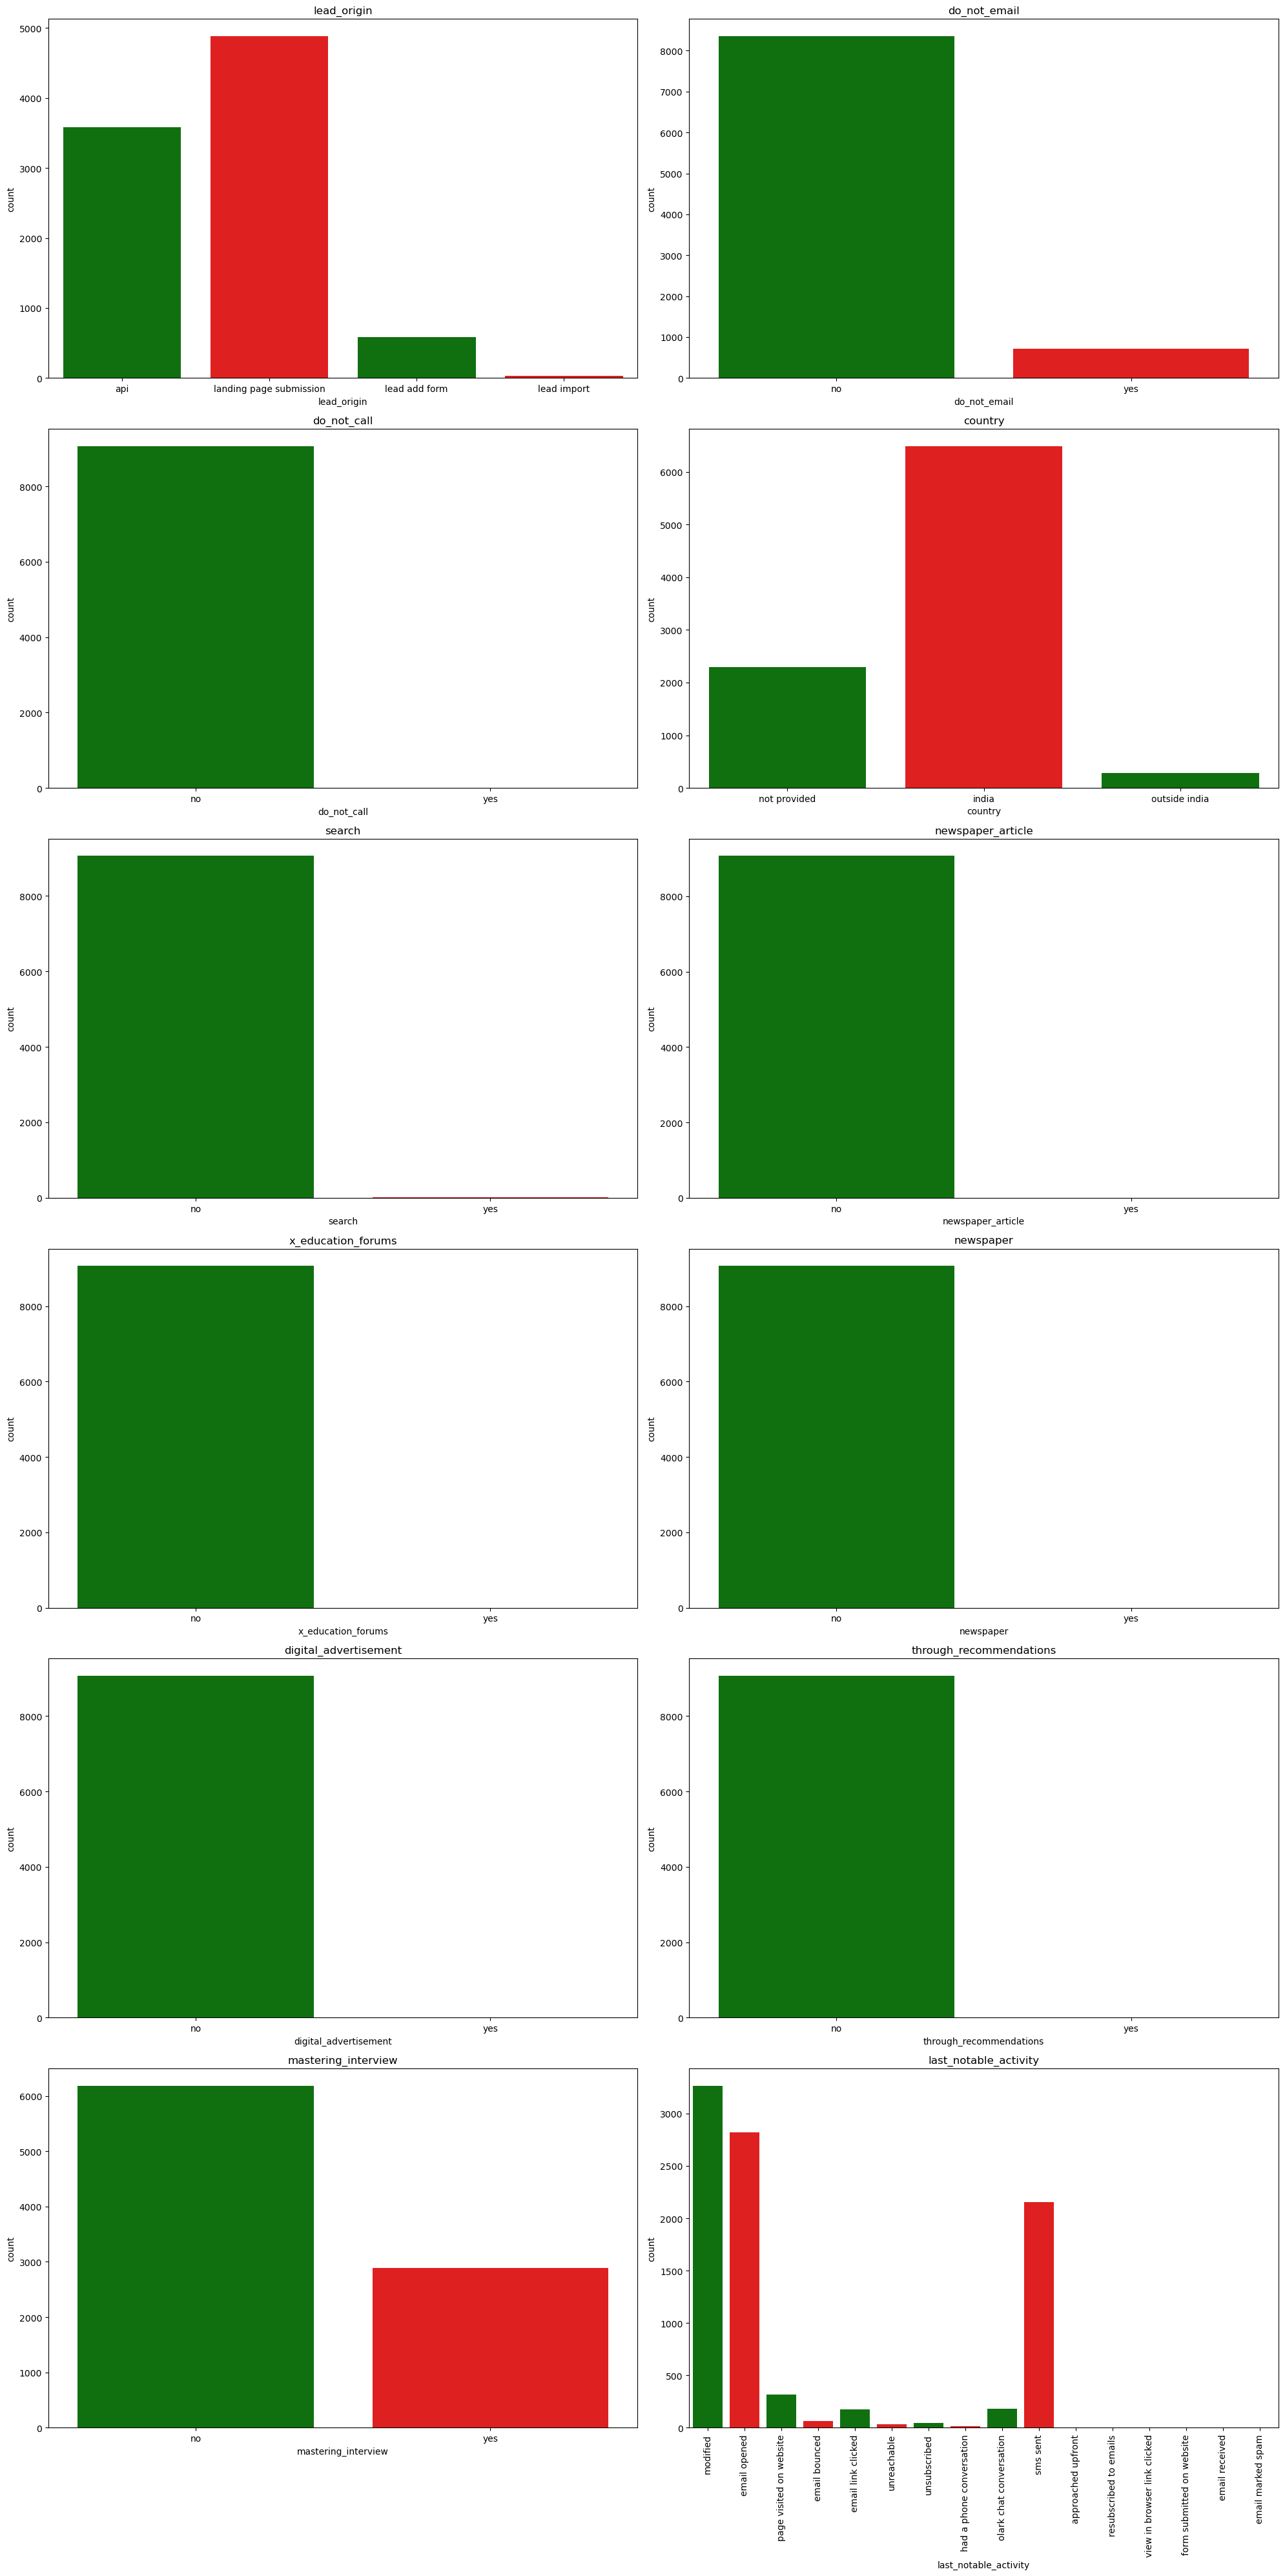

In [60]:
plt.figure(figsize=(20, 40))

plt.subplot(6, 2, 1)
sns.countplot(x='lead_origin', data=df_final, palette=['green', 'red'])
plt.title('lead_origin')

plt.subplot(6, 2, 2)
sns.countplot(x='do_not_email', data=df_final, palette=['green', 'red'])
plt.title('do_not_email')

plt.subplot(6, 2, 3)
sns.countplot(x='do_not_call', data=df_final, palette=['green', 'red'])
plt.title('do_not_call')

plt.subplot(6, 2, 4)
sns.countplot(x='country', data=df_final, palette=['green', 'red'])
plt.title('country')

plt.subplot(6, 2, 5)
sns.countplot(x='search', data=df_final, palette=['green', 'red'])
plt.title('search')

plt.subplot(6, 2, 6)
sns.countplot(x='newspaper_article', data=df_final, palette=['green', 'red'])
plt.title('newspaper_article')

plt.subplot(6, 2, 7)
sns.countplot(x='x_education_forums', data=df_final, palette=['green', 'red'])
plt.title('x_education_forums')

plt.subplot(6, 2, 8)
sns.countplot(x='newspaper', data=df_final, palette=['green', 'red'])
plt.title('newspaper')

plt.subplot(6, 2, 9)
sns.countplot(x='digital_advertisement', data=df_final, palette=['green', 'red'])
plt.title('digital_advertisement')

plt.subplot(6, 2, 10)
sns.countplot(x='through_recommendations', data=df_final, palette=['green', 'red'])
plt.title('through_recommendations')

plt.subplot(6, 2, 11)
sns.countplot(x='mastering_interview', data=df_final, palette=['green', 'red'])
plt.title('mastering_interview')

plt.subplot(6, 2, 12)
sns.countplot(x='last_notable_activity', data=df_final, palette=['green', 'red'])
plt.xticks(rotation=90)
plt.title('last_notable_activity')

plt.tight_layout()
plt.show()

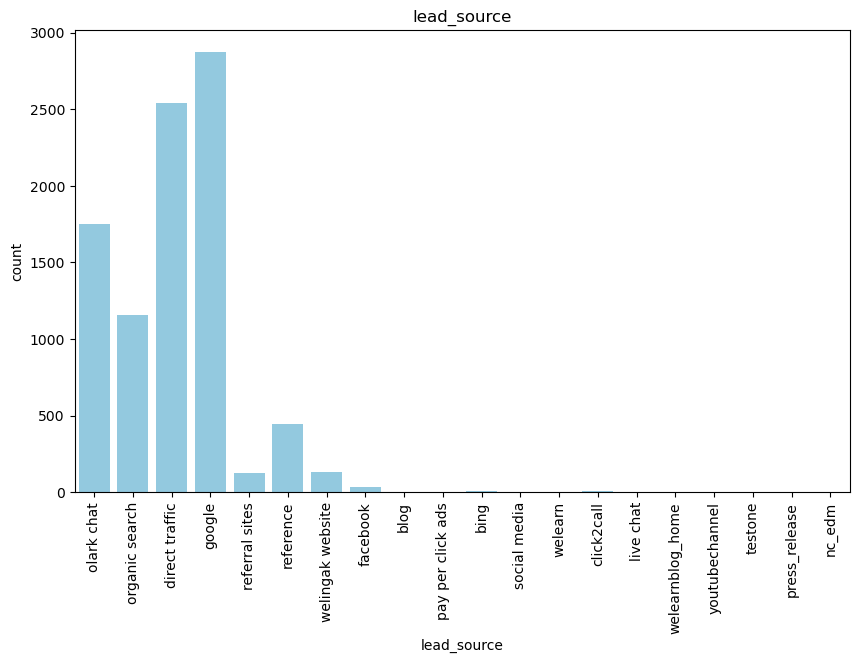

In [61]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='lead_source', data=df_final, color='skyblue') 
plt.title('lead_source')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

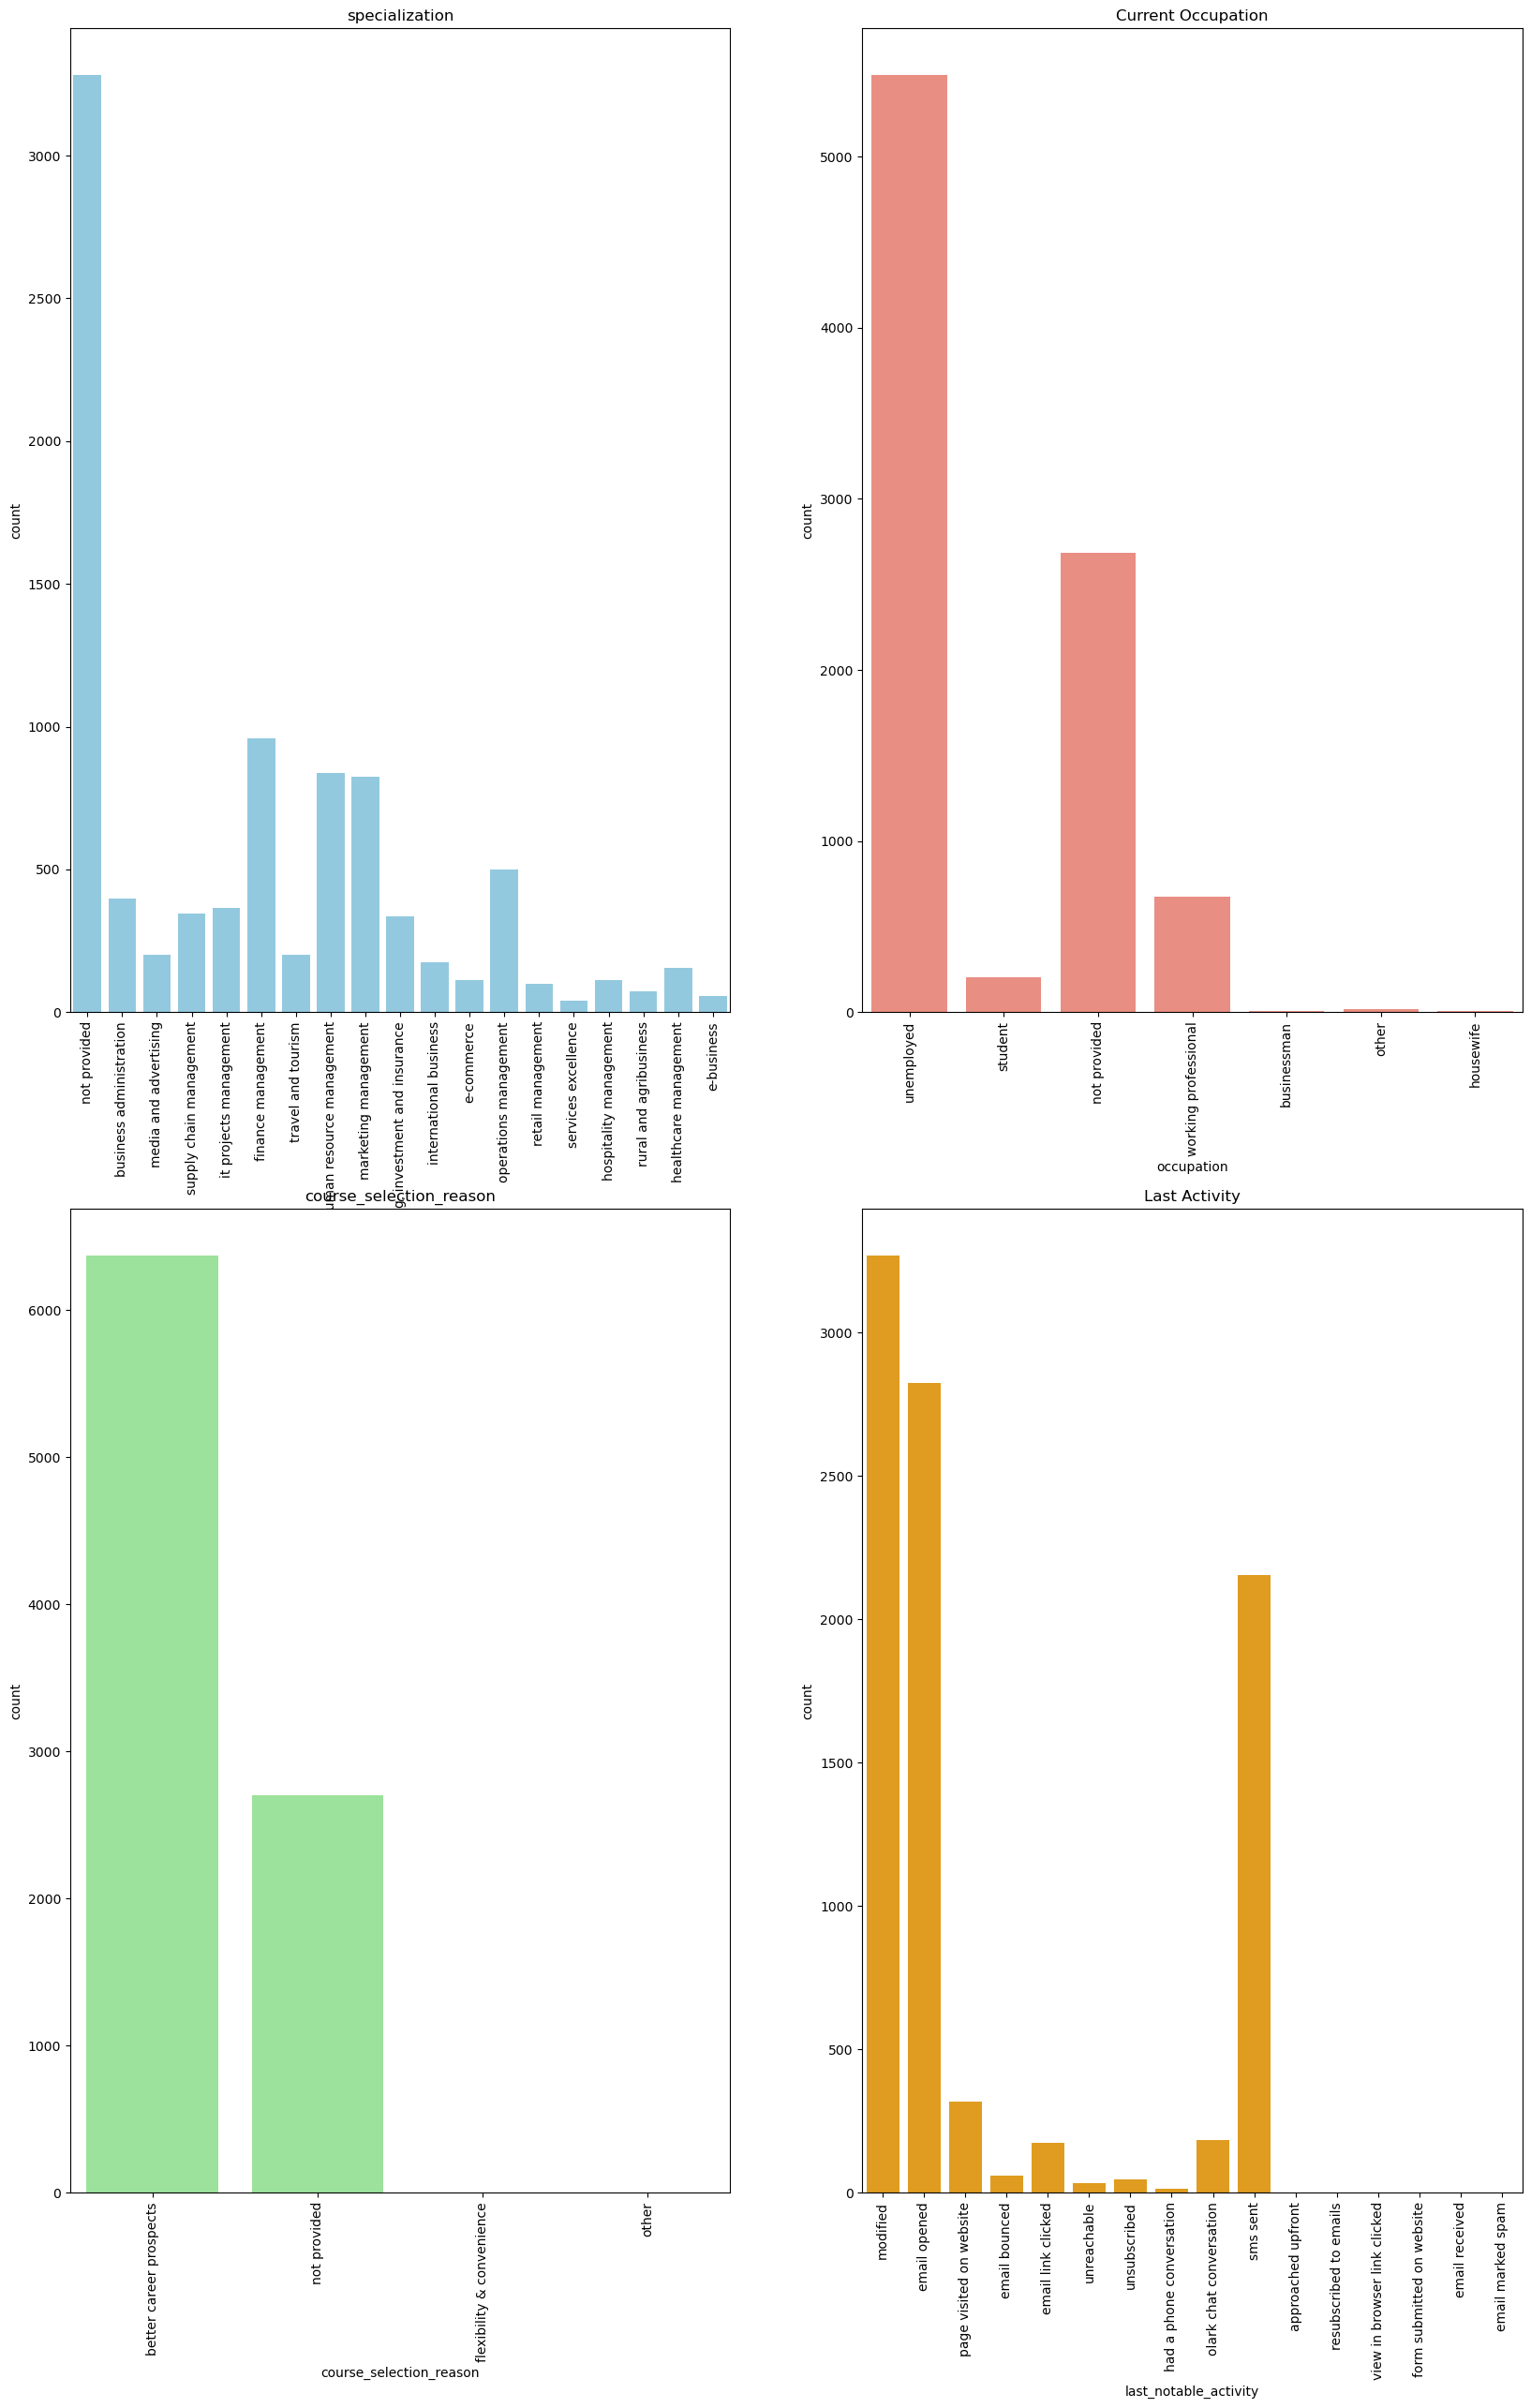

In [62]:
plt.figure(figsize=(20, 30))

plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='specialization', data=df_final, color='skyblue')
plt.title('specialization')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  

plt.subplot(2, 2, 2)
ax2 = sns.countplot(x='occupation', data=df_final, color='salmon')
plt.title('Current Occupation')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)  

plt.subplot(2, 2, 3)
ax3 = sns.countplot(x='course_selection_reason', data=df_final, color='lightgreen')
plt.title('course_selection_reason')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)  

plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='last_notable_activity', data=df_final, color='orange')
plt.title('Last Activity')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)  

plt.show()

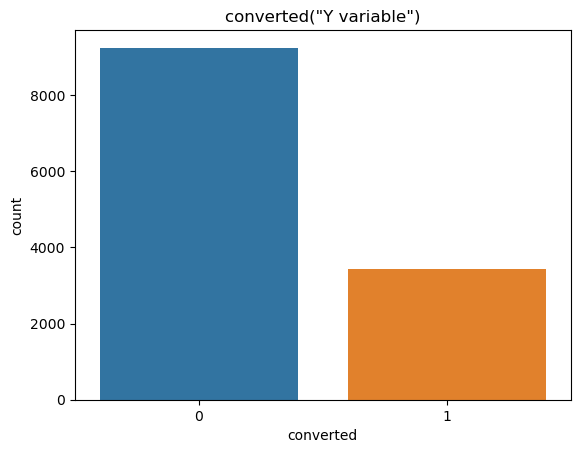

In [63]:
sns.countplot(df['converted'])
ax = sns.countplot(x='converted', data=df_final) 
plt.title('converted("Y variable")')

plt.show()

# Now let us take a look at the numerical variables as well

In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lead_number              9074 non-null   int64  
 1   lead_origin              9074 non-null   object 
 2   lead_source              9074 non-null   object 
 3   do_not_email             9074 non-null   object 
 4   do_not_call              9074 non-null   object 
 5   converted                9074 non-null   int64  
 6   total_visits             9074 non-null   float64
 7   time_on_website          9074 non-null   int64  
 8   page_views_per_visit     9074 non-null   float64
 9   last_activity            9074 non-null   object 
 10  country                  9074 non-null   object 
 11  specialization           9074 non-null   object 
 12  occupation               9074 non-null   object 
 13  course_selection_reason  9074 non-null   object 
 14  search                  

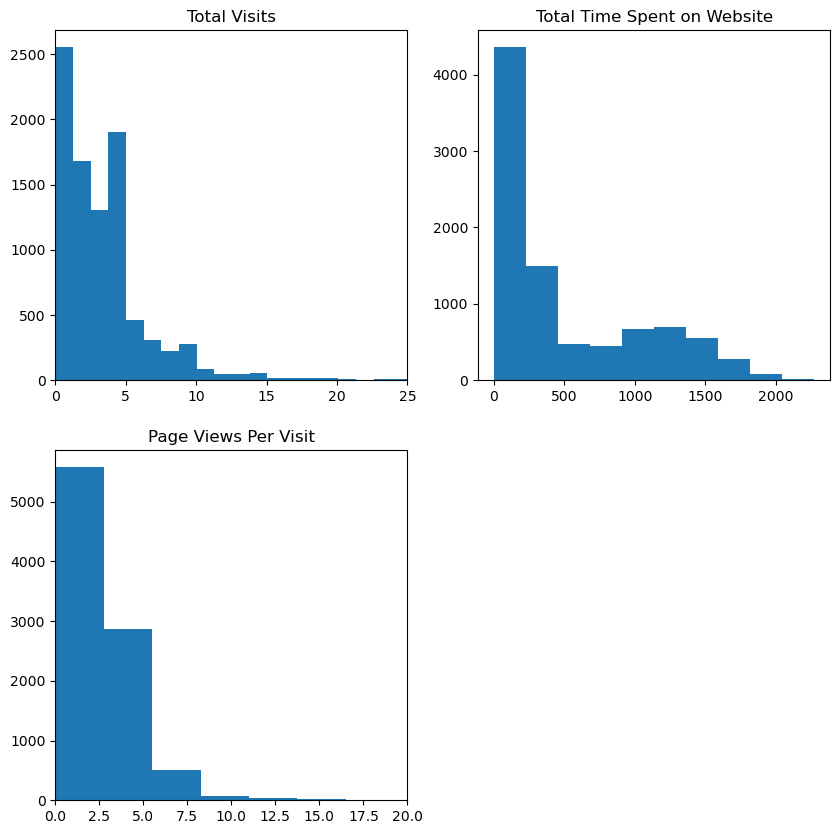

In [65]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.hist(df_final['total_visits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['time_on_website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['page_views_per_visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

# Comparing all the categorical variables with the target variable (converted).

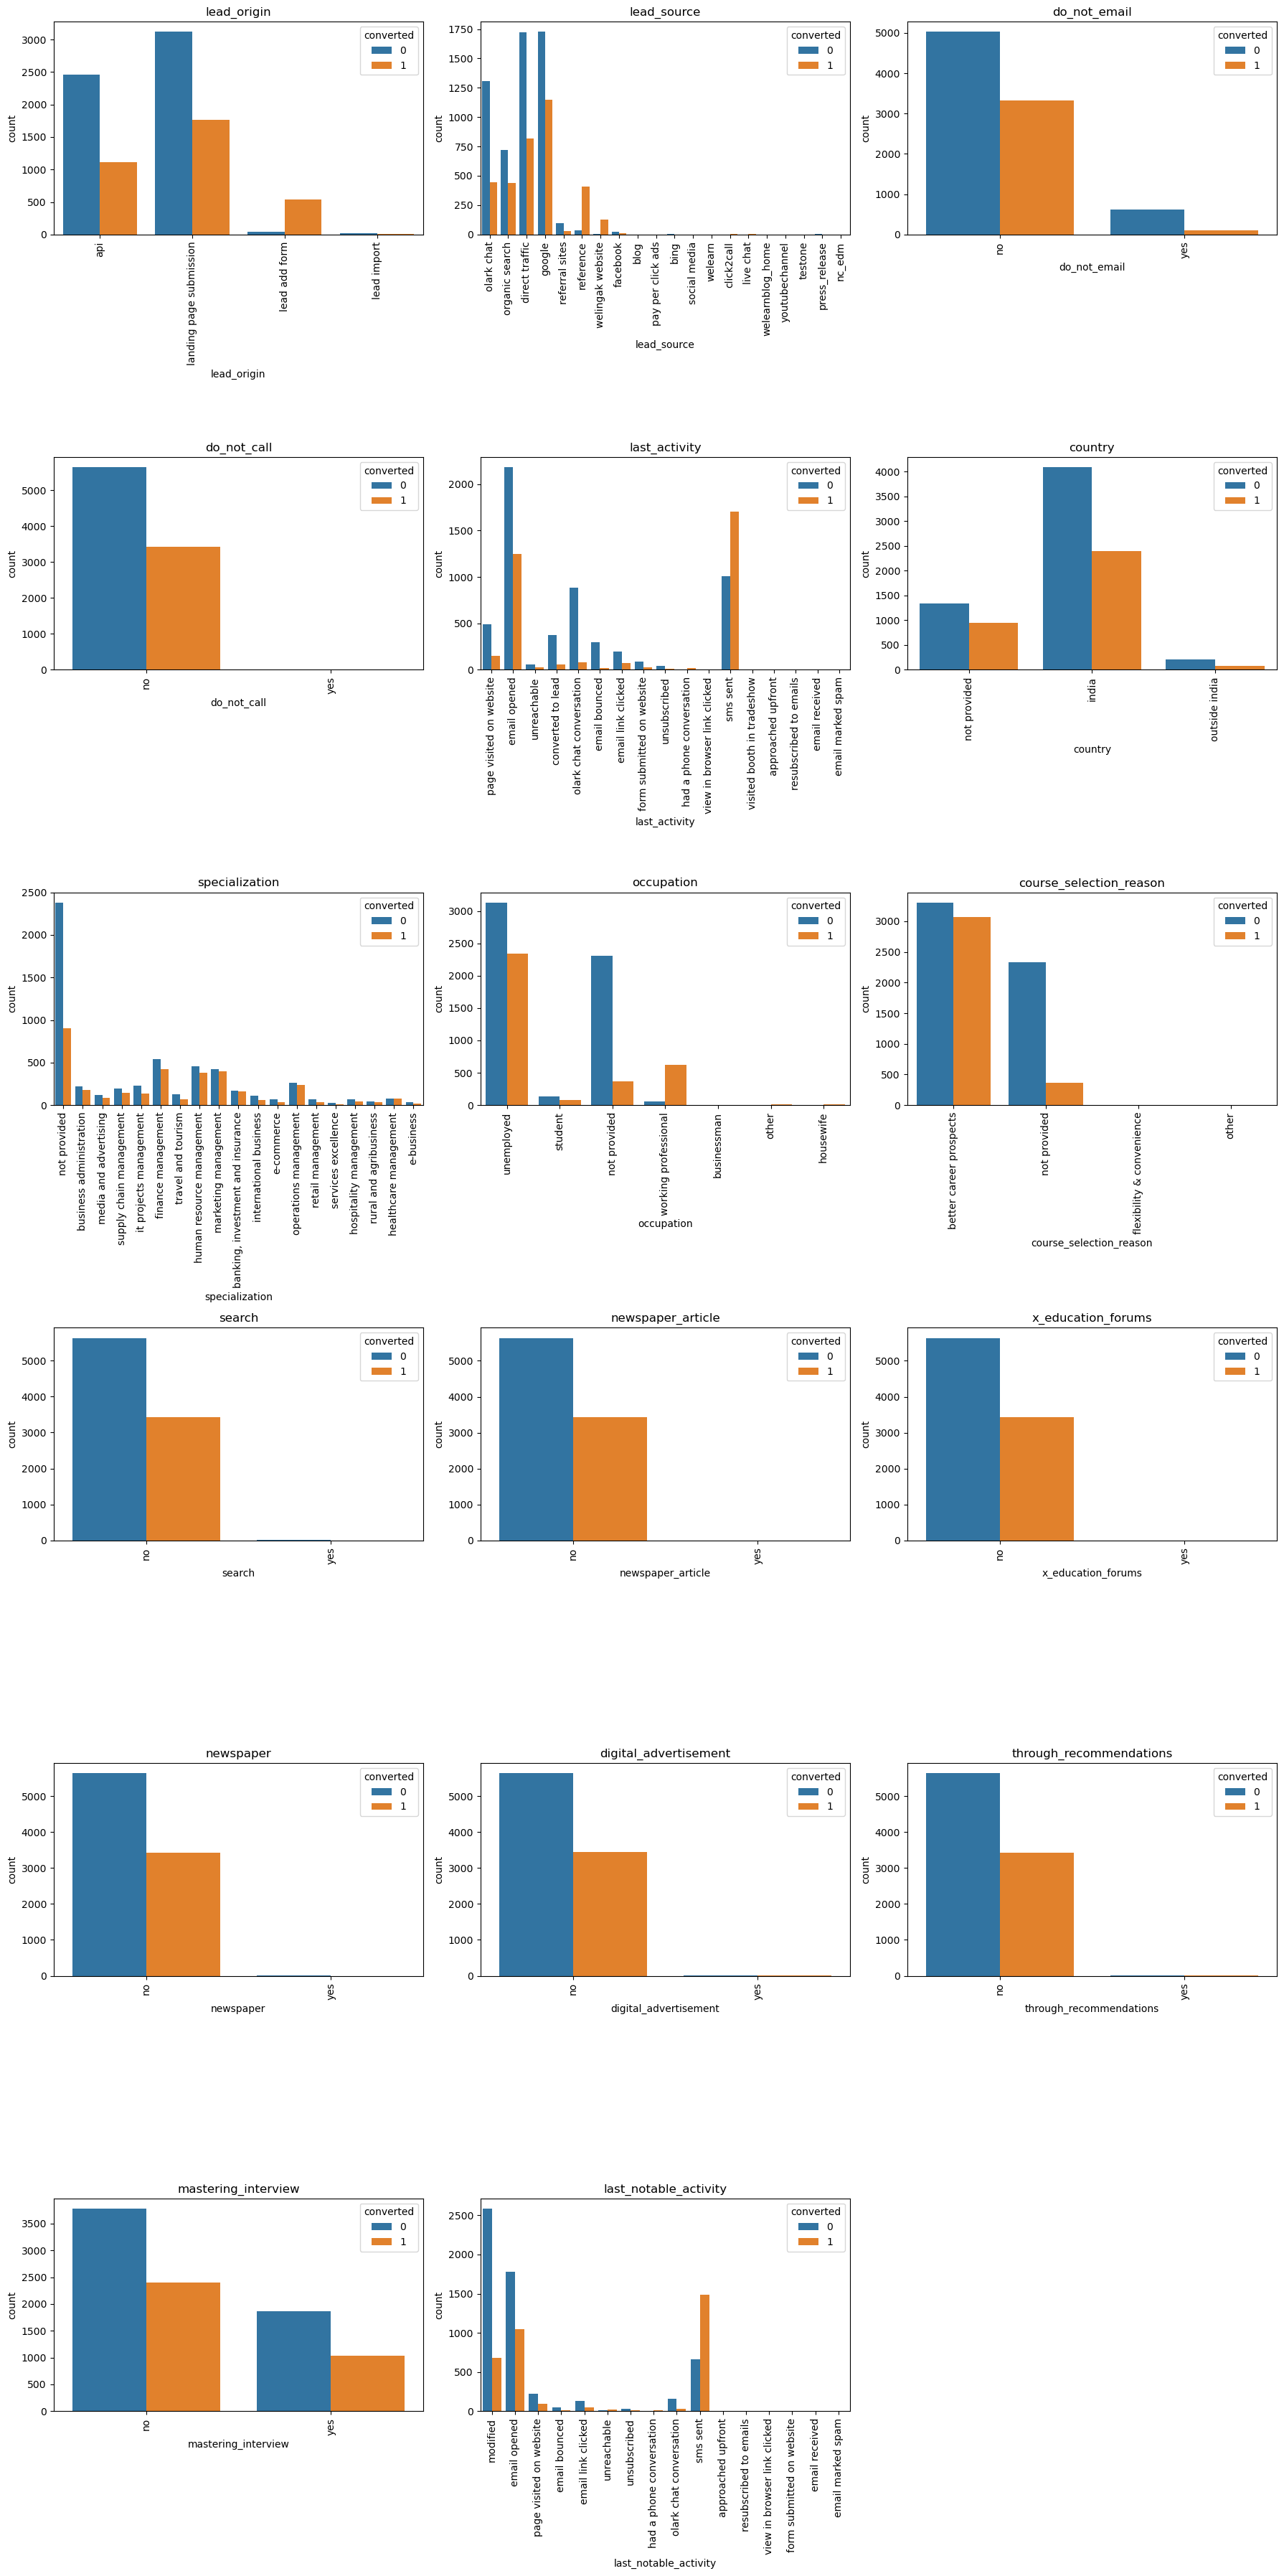

In [66]:
categorical_vars = df_final.select_dtypes(include=['object']).columns

# Set up the plot grid
num_plots = len(categorical_vars)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 6, num_rows * 6))

# Loop through categorical variables
for i, var in enumerate(categorical_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=var, hue='converted', data=df_final)
    plt.title(var)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

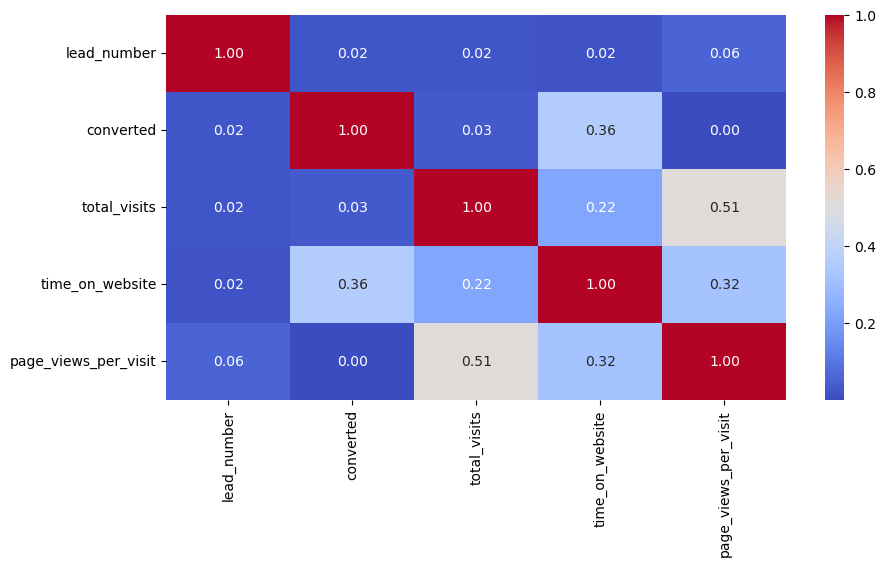

In [67]:
# To check the correlation among variables

plt.figure(figsize=(10, 5))
sns.heatmap(df_final.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# -> Assigning dummy variables

In [68]:
# Dummy variables are required to be assigned in order to convert all the categorical into numerical form for the sake regression.

dummy = pd.get_dummies(df_final[['lead_origin','specialization' ,'lead_source', 
                                 'do_not_email', 'last_notable_activity', 
                                 'occupation','mastering_interview','last_activity']], drop_first=True)

# Add the results to the master dataframe

df_final_dum = pd.concat([df_final, dummy], axis=1)

df_final_dum.head()

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,...,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,0,0,0,1,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,0,0,0,0,0,0,1,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_final_dum = df_final_dum.drop(['occupation_not provided','lead_origin', 
                                  'lead_source', 'do_not_email', 'do_not_call',
                                  'last_activity', 'country', 'specialization',
                                  'specialization_not provided',
                                  'occupation','course_selection_reason', 
                                  'search','newspaper_article', 
                                  'x_education_forums', 'newspaper',
                                  'digital_advertisement', 
                                  'through_recommendations',
                                  'mastering_interview', 
                                  'last_notable_activity'], 1)

df_final_dum.head(1)

,lead_number,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,...,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# -> Test_Train split 

In [70]:
# Test_train split technique is used to first train a model on data on some random data points from the data set and then test the models predictive power of that model on the seperate test set.

from sklearn.model_selection import train_test_split  

In [71]:
# All the predictor variables are been saved in the X variable

X = df_final_dum.drop(['converted'], 1)
X.head()

,lead_number,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,...,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Let's take the target variable into y variable

y = df_final_dum['converted']
y.head() 

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [73]:
# Splitting the dataset into 70-30 ratio for train and test respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [74]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features

scaler = MinMaxScaler()
X_train[['total_visits', 'page_views_per_visit', 'time_on_website']] = scaler.fit_transform(X_train[['total_visits', 'page_views_per_visit', 'time_on_website']])

X_train.head()

# We are using the scaling method in order to bring the numerical variables within the range 0-1.

,lead_number,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,...,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# -> Model Building

In [75]:
# Since the problem outcome is supposed to be in a Yes/No we are going to use the logistic regression technique

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
# Importing RFE because we are going to need it for the variable selection process

from sklearn.feature_selection import RFE

In [77]:
# Running RFE with 15 variables as output

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [78]:
# The top 15 variables selected by the RFE techinque are.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('lead_number', True, 1),
 ('total_visits', False, 34),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 39),
 ('lead_origin_landing page submission', True, 1),
 ('lead_origin_lead add form', True, 1),
 ('lead_origin_lead import', False, 44),
 ('specialization_business administration', False, 23),
 ('specialization_e-business', False, 40),
 ('specialization_e-commerce', False, 31),
 ('specialization_finance management', False, 12),
 ('specialization_healthcare management', False, 17),
 ('specialization_hospitality management', False, 30),
 ('specialization_human resource management', False, 8),
 ('specialization_international business', False, 32),
 ('specialization_it projects management', False, 33),
 ('specialization_marketing management', False, 7),
 ('specialization_media and advertising', False, 38),
 ('specialization_operations management', False, 11),
 ('specialization_retail management', False, 43),
 ('specialization_rural and agribusiness', False, 50),
 ('spec

In [79]:
# let's now put all the columns selected by RFE in the variable 'col'.

col = X_train.columns[rfe.support_]

In [80]:
# Selecting columns selected by RFE

X_train = X_train[col]

In [81]:
# Importing statsmodels just for sole reason that python does not add constants by default so whave to add it manually using this library

import statsmodels.api as sm

In [82]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()) # GLM => Generalised Linear Model
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Mon, 18 Mar 2024   Deviance:                       5227.1
Time:                        18:21:42   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -7.7646      0.992     -7.830      0.000      -9.708      -5.821
lead_number                            8.198e-06   1.57e-06      5.235      0.000    5.13e-06    1.13e-05
time_on_website                           4.6477      0.167     27.818      0.000       4.320       4.975
lead_origin_landing page submission      -0.1699      0.098     -1.741      0.082      -0.361       0.021
lead_origin_lead add form                 5.2351      0.727      7.204      0.000       3.811       6.659
lead_source_direct traffic               -0.2202      0.090     -2.437      0.015      -0.397      -0.043
lead_source_olark chat                    1.2035      0.122      9.893      0.000       0.965       1.442
lead_source_reference                    -1.7145      0.753     -2.278      0.023      -3.190      -0.239
do_not_email_yes                         -1.0906      0.200     -5.441      0.000      -1.483      -0.698
last_notable_activity_modified           -0.6002      0.096     -6.283      0.000      -0.787      -0.413
last_notable_activity_sms sent            0.5816      0.181      3.209      0.001       0.226       0.937
occupation_unemployed                     0.9479      0.082     11.577      0.000       0.787       1.108
occupation_working professional           3.5117      0.206     17.084      0.000       3.109       3.915
last_activity_email bounced              -0.5834      0.386     -1.510      0.131      -1.341       0.174
last_activity_olark chat conversation    -1.1751      0.175     -6.723      0.000      -1.518      -0.833
last_activity_sms sent                    0.7565      0.161      4.713      0.000       0.442       1.071
=========================================================================================================
"""

In [83]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

# A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.

In [84]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,lead_number,9.97
9,last_notable_activity_sms sent,6.69
14,last_activity_sms sent,6.51
3,lead_origin_lead add form,4.80
2,lead_origin_landing page submission,4.51
6,lead_source_reference,4.41
10,occupation_unemployed,3.21
8,last_notable_activity_modified,2.49
1,time_on_website,2.35
5,lead_source_olark chat,2.34


# From here onwards we are going to eliminate the varaibles on two measures VIF and p-values

In [85]:
# This variable is being eliminated due to it's high p-value

X_train.drop('last_activity_email bounced', axis = 1, inplace = True)

In [86]:
# Refitting the model with the remaining set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.8
Date:                Mon, 18 Mar 2024   Deviance:                       5229.5
Time:                        18:21:43   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -7.7488      0.991     -7.818      0.000      -9.692      -5.806
lead_number                            8.171e-06   1.57e-06      5.221      0.000     5.1e-06    1.12e-05
time_on_website                           4.6474      0.167     27.830      0.000       4.320       4.975
lead_origin_landing page submission      -0.1711      0.098     -1.754      0.079      -0.362       0.020
lead_origin_lead add form                 5.2316      0.726      7.206      0.000       3.809       6.655
lead_source_direct traffic               -0.2221      0.090     -2.458      0.014      -0.399      -0.045
lead_source_olark chat                    1.1980      0.122      9.854      0.000       0.960       1.436
lead_source_reference                    -1.6986      0.752     -2.259      0.024      -3.172      -0.225
do_not_email_yes                         -1.2500      0.174     -7.167      0.000      -1.592      -0.908
last_notable_activity_modified           -0.6170      0.095     -6.504      0.000      -0.803      -0.431
last_notable_activity_sms sent            0.5665      0.181      3.127      0.002       0.211       0.922
occupation_unemployed                     0.9498      0.082     11.602      0.000       0.789       1.110
occupation_working professional           3.5072      0.205     17.103      0.000       3.105       3.909
last_activity_olark chat conversation    -1.1575      0.174     -6.635      0.000      -1.499      -0.816
last_activity_sms sent                    0.7818      0.160      4.890      0.000       0.468       1.095
=========================================================================================================
"""

In [87]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,lead_number,9.97
9,last_notable_activity_sms sent,6.61
13,last_activity_sms sent,6.35
3,lead_origin_lead add form,4.80
2,lead_origin_landing page submission,4.51
6,lead_source_reference,4.41
10,occupation_unemployed,3.21
8,last_notable_activity_modified,2.41
1,time_on_website,2.35
5,lead_source_olark chat,2.34


In [88]:
# Lead number gets eliminated due to it's high VIF value

X_train.drop('lead_number', axis = 1, inplace = True)

In [89]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.5
Date:                Mon, 18 Mar 2024   Deviance:                       5257.0
Time:                        18:21:44   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6282      0.118    -22.252      0.000      -2.860      -2.397
time_on_website                           4.6411      0.167     27.852      0.000       4.314       4.968
lead_origin_landing page submission      -0.1941      0.097     -1.993      0.046      -0.385      -0.003
lead_origin_lead add form                 5.2290      0.727      7.190      0.000       3.804       6.654
lead_source_direct traffic               -0.2815      0.089     -3.148      0.002      -0.457      -0.106
lead_source_olark chat                    1.1194      0.120      9.318      0.000       0.884       1.355
lead_source_reference                    -1.7227      0.753     -2.289      0.022      -3.198      -0.248
do_not_email_yes                         -1.3118      0.174     -7.548      0.000      -1.652      -0.971
last_notable_activity_modified           -0.5998      0.095     -6.343      0.000      -0.785      -0.414
last_notable_activity_sms sent            0.4912      0.180      2.732      0.006       0.139       0.844
occupation_unemployed                     0.9417      0.082     11.502      0.000       0.781       1.102
occupation_working professional           3.4913      0.204     17.102      0.000       3.091       3.891
last_activity_olark chat conversation    -1.1789      0.174     -6.774      0.000      -1.520      -0.838
last_activity_sms sent                    0.7625      0.159      4.794      0.000       0.451       1.074
=========================================================================================================
"""

In [90]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,last_notable_activity_sms sent,6.57
12,last_activity_sms sent,6.35
2,lead_origin_lead add form,4.63
5,lead_source_reference,4.41
1,lead_origin_landing page submission,3.33
9,occupation_unemployed,2.59
7,last_notable_activity_modified,2.16
0,time_on_website,2.03
3,lead_source_direct traffic,1.94
11,last_activity_olark chat conversation,1.59


In [91]:
# This variable holds the highest p-value therefore will have to drop it

X_train.drop('lead_origin_landing page submission', axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.5
Date:                Mon, 18 Mar 2024   Deviance:                       5261.0
Time:                        18:21:44   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7403      0.105    -26.196      0.000      -2.945      -2.535
time_on_website                           4.6398      0.167     27.845      0.000       4.313       4.966
lead_origin_lead add form                 5.3463      0.725      7.375      0.000       3.925       6.767
lead_source_direct traffic               -0.3523      0.082     -4.299      0.000      -0.513      -0.192
lead_source_olark chat                    1.2311      0.107     11.516      0.000       1.022       1.441
lead_source_reference                    -1.7226      0.753     -2.289      0.022      -3.198      -0.248
do_not_email_yes                         -1.3157      0.173     -7.587      0.000      -1.656      -0.976
last_notable_activity_modified           -0.5946      0.095     -6.290      0.000      -0.780      -0.409
last_notable_activity_sms sent            0.4939      0.180      2.750      0.006       0.142       0.846
occupation_unemployed                     0.9350      0.082     11.440      0.000       0.775       1.095
occupation_working professional           3.4749      0.204     17.041      0.000       3.075       3.875
last_activity_olark chat conversation    -1.1532      0.174     -6.645      0.000      -1.493      -0.813
last_activity_sms sent                    0.7589      0.159      4.776      0.000       0.447       1.070
=========================================================================================================
"""

In [93]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,last_notable_activity_sms sent,6.57
11,last_activity_sms sent,6.35
1,lead_origin_lead add form,4.56
4,lead_source_reference,4.41
8,occupation_unemployed,2.29
6,last_notable_activity_modified,2.10
0,time_on_website,1.91
10,last_activity_olark chat conversation,1.58
3,lead_source_olark chat,1.51
2,lead_source_direct traffic,1.44


In [94]:
# Droping this variable due to it's high VIF value

X_train.drop('last_notable_activity_sms sent', axis = 1, inplace = True)

In [95]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Mon, 18 Mar 2024   Deviance:                       5268.6
Time:                        18:21:45   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3965
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7194      0.104    -26.120      0.000      -2.923      -2.515
time_on_website                           4.6363      0.167     27.829      0.000       4.310       4.963
lead_origin_lead add form                 5.2919      0.724      7.311      0.000       3.873       6.711
lead_source_direct traffic               -0.3510      0.082     -4.290      0.000      -0.511      -0.191
lead_source_olark chat                    1.2266      0.107     11.499      0.000       1.018       1.436
lead_source_reference                    -1.6872      0.752     -2.244      0.025      -3.161      -0.213
do_not_email_yes                         -1.2976      0.173     -7.494      0.000      -1.637      -0.958
last_notable_activity_modified           -0.7342      0.081     -9.101      0.000      -0.892      -0.576
occupation_unemployed                     0.9611      0.081     11.849      0.000       0.802       1.120
occupation_working professional           3.5034      0.204     17.164      0.000       3.103       3.903
last_activity_olark chat conversation    -1.0868      0.172     -6.311      0.000      -1.424      -0.749
last_activity_sms sent                    1.1444      0.074     15.425      0.000       0.999       1.290
=========================================================================================================
"""

In [96]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,lead_origin_lead add form,4.56
4,lead_source_reference,4.41
7,occupation_unemployed,2.20
0,time_on_website,1.91
6,last_notable_activity_modified,1.59
10,last_activity_sms sent,1.54
9,last_activity_olark chat conversation,1.53
3,lead_source_olark chat,1.51
2,lead_source_direct traffic,1.44
8,occupation_working professional,1.30


# The VIF values are fine now, and the p-values are below 0.05 as well

# -> Now time to start prediction

In [97]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.746930
3604    0.183515
5584    0.370134
7679    0.183515
7563    0.465721
7978    0.802218
7780    0.170410
7863    0.971631
838     0.726373
708     0.113274
dtype: float64

In [98]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74693   , 0.18351474, 0.37013422, 0.18351474, 0.46572124,
       0.80221781, 0.17041007, 0.97163114, 0.72637268, 0.11327371])

In [99]:
# Data frame with given conversion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.746930
1,0,0.183515
2,0,0.370134
3,0,0.183515
4,0,0.465721


In [100]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.746930,1
1,0,0.183515,0
2,0,0.370134,0
3,0,0.183515,0
4,0,0.465721,0


# -> Model Evaluation

In [101]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

# This library wil bbe needed for the Evaluationn metrics such as confusion matrix.

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3460,  435],
       [ 740, 1716]], dtype=int64)

In [103]:
# This is how to read a confusuion matrix

# Predicted     not_churn    churn
# Actual
# not_churn        3459       436
# churn             738      1718

In [104]:
# Checking the accuracy of the model

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.814989765391277

# The accuracy is 81.4%(approx) which is indeed a good accuracy

In [105]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [106]:
# Calculating the sensitivity

TP/(TP+FN)

0.6986970684039088

In [107]:
# Calculating the specificity

TN/(TN+FP)

0.8883183568677792

## With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 89%.

### But as we know 0.5 is just a random cutoff we assumed so in order to optimise our cutoff we need to use the ROC curve.

In [108]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('acTrue Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

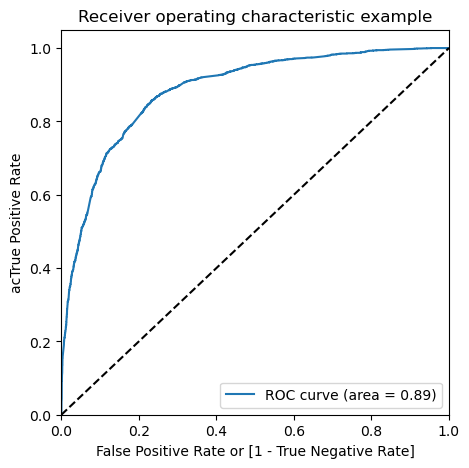

In [110]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The area under the curve is 0.89 which is really good value

In [111]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.746930,1,1,1,1,1,1,1,1,1,0,0
1,0,0.183515,0,1,1,0,0,0,0,0,0,0,0
2,0,0.370134,0,1,1,1,1,0,0,0,0,0,0
3,0,0.183515,0,1,1,0,0,0,0,0,0,0,0
4,0,0.465721,0,1,1,1,1,1,0,0,0,0,0


In [112]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.623051,0.969870,0.404365
0.2,0.2,0.756416,0.913274,0.657510
0.3,0.3,0.799402,0.860749,0.760719
0.4,0.4,0.810424,0.776059,0.832092
0.5,0.5,0.814990,0.698697,0.888318
0.6,0.6,0.803023,0.625814,0.914763
0.7,0.7,0.777673,0.512215,0.945058
0.8,0.8,0.752322,0.411238,0.967394
0.9,0.9,0.707605,0.265065,0.986650


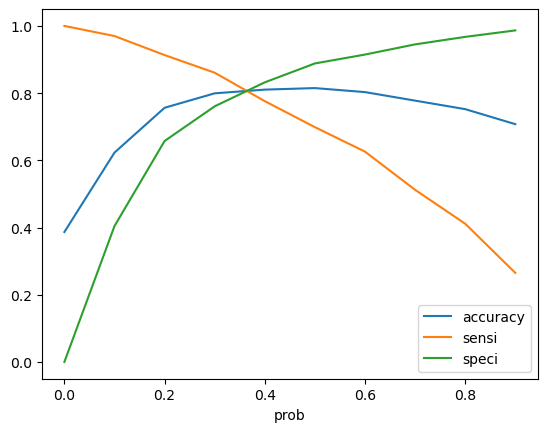

In [113]:
# Plotting the graph for all the three parameters

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### This graph proves that the optimal cut off is 0.38

In [114]:
# Adding the values according to the optimal cut off of 0.38 

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.746930,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.183515,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.370134,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.183515,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.465721,0,1,1,1,1,1,0,0,0,0,0,1


In [115]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088490001574555

In [116]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[3203,  692],
       [ 522, 1934]], dtype=int64)

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Calculating the sensitivity

TP/(TP+FN)

0.7874592833876222

In [119]:
# Calculating the specificity

TN/(TN+FP)

0.8223363286264441

In [120]:
X_test.head()

,lead_number,total_visits,time_on_website,page_views_per_visit,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,specialization_business administration,specialization_e-business,specialization_e-commerce,...,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow
8308,586397,5.0,947,5.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7212,594083,4.0,3,4.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2085,639518,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4048,621209,4.0,1402,2.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4790,614037,4.0,12,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## With the optimal cut off 0.38 the values of sensitivity, accuracy and specificity lies around 80%

# -> Now let's begin prediction on test set 

In [121]:
# Scaling numeric values

X_test[['total_visits', 'page_views_per_visit', 'time_on_website']] = scaler.transform(X_test[['total_visits', 'page_views_per_visit', 'time_on_website']])

In [122]:
# Substituting all the columns selected by the RFE in the final train model

col = X_train.columns

In [123]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]

# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

X_test_sm

,const,time_on_website,lead_origin_lead add form,lead_source_direct traffic,lead_source_olark chat,lead_source_reference,do_not_email_yes,last_notable_activity_modified,occupation_unemployed,occupation_working professional,last_activity_olark chat conversation,last_activity_sms sent
8308,1.0,0.416813,0,1,0,0,0,1,1,0,0,0
7212,1.0,0.001320,0,0,0,0,0,0,0,1,0,1
2085,1.0,0.000000,1,0,0,0,0,0,1,0,0,0
4048,1.0,0.617077,0,1,0,0,0,0,1,0,0,1
4790,1.0,0.005282,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0,0,1,0,0,1,1,0,1,0
8179,1.0,0.148768,0,0,0,0,0,1,0,0,0,1
6236,1.0,0.000000,0,0,1,0,0,0,0,0,0,0
5240,1.0,0.458627,0,0,0,0,0,0,1,0,0,1


In [124]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,converted,Conversion_Prob
0,0,0.286805
1,1,0.873747
2,1,0.971631
3,1,0.869443
4,0,0.110588


In [125]:
# Making prediction using cut off 0.38

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_pred_final


,converted,Conversion_Prob,final_predicted
0,0,0.286805,0
1,1,0.873747,1
2,1,0.971631,1
3,1,0.869443,1
4,0,0.110588,0
...,...,...,...
2718,1,0.086862,0
2719,0,0.165282,0
2720,0,0.183515,0
2721,1,0.819424,1


In [126]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)


0.8163789937568858

In [127]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )

confusion2

array([[1446,  298],
       [ 202,  777]], dtype=int64)

In [128]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [129]:
# Calculating the sensitivity

TP/(TP+FN)

0.7936670071501533

In [130]:
# Calculating the specificity

TN/(TN+FP)

0.8291284403669725

### With the current cut off as 0.38 we have accuracy, sensitivity and specificity of around 80%.

# -> Precision - Recall

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

confusion

array([[3460,  435],
       [ 740, 1716]], dtype=int64)

In [132]:
# Formula for precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.797768479776848

In [133]:
#formula for recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6986970684039088

### With the current cut off as 0.38 the Precision is approx. 79.7% and Recall around 70%.

## -> Precision and recall tradeoff 

In [134]:
from sklearn.metrics import precision_recall_curve

In [135]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

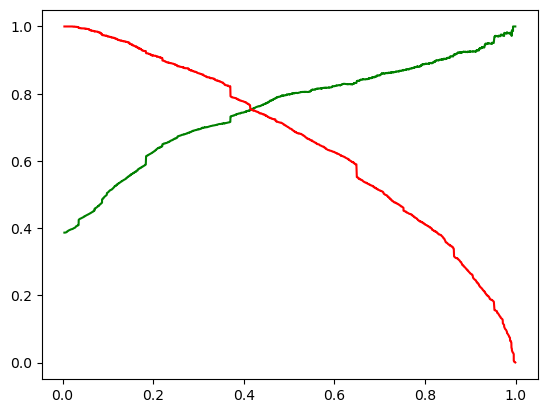

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [138]:
# Looking at the trade off curve it can be observed that 0.41 is the optimal cutoff here

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.746930,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.183515,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.370134,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.183515,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.465721,0,1,1,1,1,1,0,0,0,0,0,1


In [139]:
# Accuracy when the cutoff is 0.41

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8113682884585105

In [140]:
# Creating confusion matrix again for 0.41 cutoff

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[3262,  633],
       [ 565, 1891]], dtype=int64)

In [141]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7492076069730587

In [143]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7699511400651465

### With the cutoff as 0.41 the precision is around 74% and recall is 76%

In [144]:
# predicting on the test set again whe the cutoff is optimised to 0.41

# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,converted,Conversion_Prob
0,0,0.286805
1,1,0.873747
2,1,0.971631
3,1,0.869443
4,0,0.110588


In [145]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_pred_final.head()

,converted,Conversion_Prob,final_predicted
0,0,0.286805,0
1,1,0.873747,1
2,1,0.971631,1
3,1,0.869443,1
4,0,0.110588,0


In [146]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.8174807197943444

In [147]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )

confusion2

array([[1471,  273],
       [ 224,  755]], dtype=int64)

In [148]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [149]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7344357976653697

In [150]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7711950970377937

### With this cutoff of 0.41 the precision is approx. 73% and recall is 77% 

## Insights
It can be observed that the variables that hold most significance in analyising the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.